# Problem Statement 5
### Implement anomaly detection for given ECG dataset using Autoencoder and build the model by using the following steps:
    a. Import required libraries
    b. Upload / access the dataset
    c. Encoder converts it into latent representation
    d. Decoder networks convert it back to the original input
    e. Compile the models with Optimizer, Loss, and Evaluation Metrics

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout

# Upload/access dataset

In [ ]:
data=pd.read_csv("ecg_autoencoder_dataset.csv",header=None)

In [ ]:
data.head()

0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140  
0  0.257740  0.228077  0.123431  0.925286  0.193137    1  
1  0.555784  0.476333  0.773820  1.119621 -1.436250    1  
2 -0.713683 -0.532197  0.321097  0.904227 -0.421797    1  
3  0.952074  0.990133  1.086798  1.403011 -0.383564    1  
4  1.277392  0.960304  0.971020  1.614392  1.421456    1  

[5 rows x 141 columns]

In [ ]:
features = data.drop(140,axis=1)
features.head()

0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       130       131       132       133  \
0 -1.818286 -1.250522 -0.477492  ...  0.160348  0.792168  0.933541  0.796958   
1 -0.992258 -0.754680  0.042321  ...  0.560327  0.538356  0.656881  0.787490   
2 -1.490659 -1.183580 -0.394229  ...  1.284825  0.886073  0.531452  0.311377   
3 -1.671131 -1.333884 -0.965629  ...  0.491173  0.350816  0.499111  0.600345   
4 -1.783423 -1.594450 -0.753199  ...  0.966606  1.148884  0.958434  1.059025   

        134       135       136       137       138       139  
0  0.578621  0.257740  0.228077  0.123431  0.925286  0.193137  
1  0.724046  0.555784  0.476333  0.773820  1.119621 -1.436250  
2 -0.021919 -0.713683 -0.532197  0.321097  0.904227 -0.421797  
3  0.842069  0.952074  0.990133  1.086798  1.403011 -0.383564  
4  1.371682  1.277392  0.960304  0.971020  1.614392  1.421456  

[5 rows x 140 columns]

In [ ]:
target=data[140]
target.head()

0    1
1    1
2    1
3    1
4    1
Name: 140, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target)

train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

# Encoder converts it into latent representation

# Decoder network convert it back to original input

In [ ]:
class Autoencoder(Model):
    def __init__(self, output_units, ldim=8):
        super().__init__()
        self.encoder = Sequential([
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(ldim, activation='relu')
        ])
        self.decoder = Sequential([
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(output_units, activation='sigmoid')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# Compile models with optimizers, loss, and evaluation metrics

In [ ]:
model = Autoencoder(output_units=x_train_scaled.shape[1])

model.compile(loss='msle', optimizer='adam', metrics=['mse'])
epochs=20

h = model.fit(x_train_scaled, x_train_scaled, epochs = epochs, batch_size=512, validation_data=(x_test_scaled, x_test_scaled))


Epoch 1/20
5/5 [==============================] - 1s 50ms/step - loss: 0.0107 - mse: 0.0237 - val_loss: 0.0127 - val_mse: 0.0290
Epoch 2/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0103 - mse: 0.0230 - val_loss: 0.0126 - val_mse: 0.0287
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0100 - mse: 0.0222 - val_loss: 0.0124 - val_mse: 0.0283
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0093 - mse: 0.0207 - val_loss: 0.0121 - val_mse: 0.0277
Epoch 5/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0084 - mse: 0.0187 - val_loss: 0.0121 - val_mse: 0.0275
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0076 - mse: 0.0169 - val_loss: 0.0117 - val_mse: 0.0268
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0068 - mse: 0.0151 - val_loss: 0.0111 - val_mse: 0.0254
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0062 - mse: 0.0137 - val

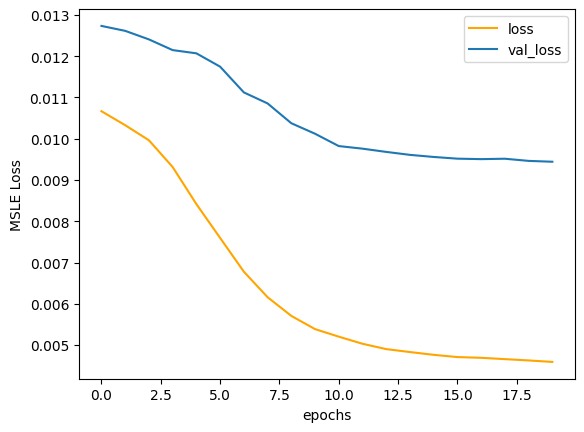

In [ ]:
plt.plot(h.history['loss'],label='loss',color='orange')
plt.plot(h.history['val_loss'],label='val_loss')
plt.ylabel('MSLE Loss')
plt.xlabel('epochs')
plt.legend()

In [ ]:
def find_threshold(model, x_train_scaled):
    reconstruction = model.predict(x_train_scaled)
    reconstruction_errors = tf.keras.losses.msle(reconstruction, x_train_scaled)
    threshold = np.mean(reconstruction_errors.numpy()) \
    + np.std(reconstruction_errors.numpy())
    return threshold

In [ ]:
def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
    anamoly_mask = pd.Series(errors)>threshold
    preds = anamoly_mask.map(lambda x:0.0 if x == True else 1.0)
    return preds

In [ ]:
threshold = find_threshold(model, x_train_scaled)
print(threshold)

73/73 [==============================] - 0s 865us/step
0.010215597558682541


In [ ]:
prediction = get_predictions(model, x_test_scaled, threshold)
accuracy_score(prediction, y_test)

32/32 [==============================] - 0s 846us/step


0.938